# Networkx

* Пакет для Python для манипулирования графиками и их анализа
* Содержит множество стандатных алгоритмов для графов

In [92]:
from typing import Any

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


Networkx поддерживает неориентированные/ориентированные графы/мультиграфы (мультиграфы позволяют одной паре узлов иметь несколько ребер):
*  Неориентированный граф: `nx.Graph`
*  Ориентированный граф: `nx.DiGraph`
*  Неориентированный мультиграф: `nx.MultiGraph`
*  Ориентированный мультиграф: `nx.MultiDiGraph`

In [93]:
G = nx.Graph()

Networkx имеет отличный набор методов для отображения графов. Напишем функцию, которую будем использовать на вывода графов на экран

In [94]:
def plot_graph(G):
    options = dict(
        font_size=12,
        node_size=500,
        node_color="white",
        edgecolors="black",
    )
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    if nx.is_weighted(G):
        labels = {e: G.edges[e]['weight'] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

Классы графов имеют интерфейс для явного добавления ребер и узлов. Следующие команды, например, строят граф ниже

![graph 1](graph_1.png)

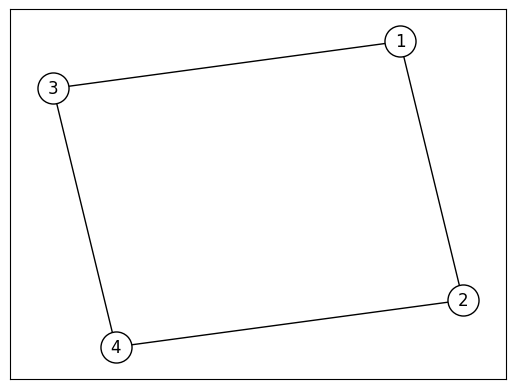

In [95]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
plot_graph(G)

Мы также можем создать граф напрямую из списка ребер:

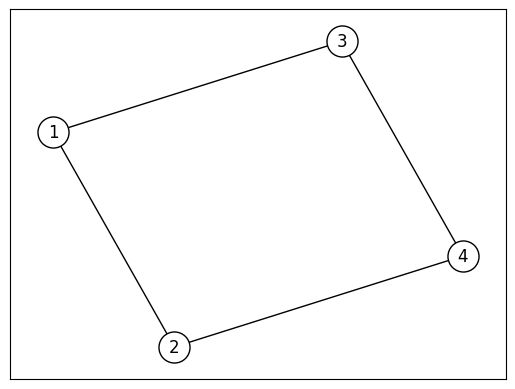

In [96]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)
plot_graph(G)

Опционально мы всегда можем сделать граф взвешенным. Для этого в метод `add_edge()` передается ключевое слово `weight`. Тоже можно сделать и используя метод `add_weighted_edges_from()`:

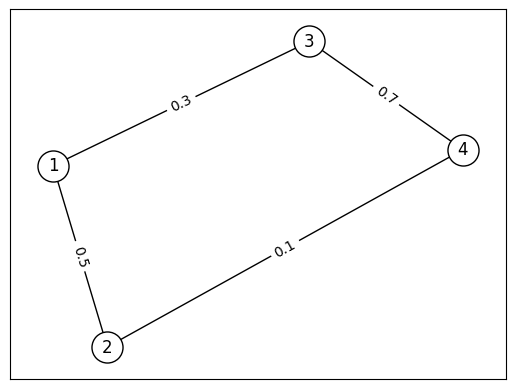

In [97]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
plot_graph(G)

Названия узлов могут быть произвольными hashable. Мы также может добавлять произвольные аттрибуты в узлам и ребрам:

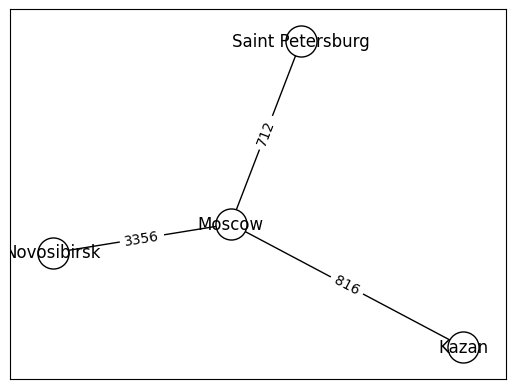

In [98]:
G = nx.Graph()
G.add_nodes_from([
    ('Moscow', dict(population=13.1)),
    ('Saint Petersburg', dict(population=5.6)),
    ('Kazan', dict(population=1.3)),
    ('Novosibirsk', dict(population=1.6)),
])
G.add_weighted_edges_from([
    ('Moscow', 'Saint Petersburg', 712),
    ('Moscow', 'Kazan',  816),
    ('Moscow', 'Novosibirsk',  3356)])
plot_graph(G)

Networkx предоставляет удобный интерфейс для доступа к узлам/ребрам и их аттрибутам, а также позволяет легко итерироваться по ним. Рассмотрим несколько популярных операций

Количество узлов в графе:

In [99]:
len(G)

4

Количество ребер в графе:

In [100]:
len(G.edges)

3

Проверка, присутствует ли узел в графе:

In [101]:
'Moscow' in G

True

In [102]:
G.has_node('Moscow')

True

Проверка, присутствует ли ребро в графе:

In [103]:
('Moscow', 'Saint Petersburg') in G.edges

True

In [104]:
G.has_edge('Moscow', 'Saint Petersburg')

True

Итерация по узлам:

In [105]:
for n in G:
    if n != 'Moscow':
        print(n)

Saint Petersburg
Kazan
Novosibirsk


Итерация по ребрам:

In [106]:
for n_in, n_out in G.edges:
    print(f'{n_in} -- {n_out}')

Moscow -- Saint Petersburg
Moscow -- Kazan
Moscow -- Novosibirsk


Итерацией по ребрам вместе с аттрибутами:

In [107]:
for n_in, n_out, dist in G.edges.data('distance'):
    print(f'{n_in} -- {n_out} ({dist} km)')

Moscow -- Saint Petersburg (None km)
Moscow -- Kazan (None km)
Moscow -- Novosibirsk (None km)


Итерация по соседям узла:

In [108]:
for n in G.neighbors('Moscow'):
    print(n)

Saint Petersburg
Kazan
Novosibirsk


Наконец, мы можем сохранять графы в файлы и вычитывать их из них. Для простых задач мы можем использовать `adjlist` и `edgelist` форматы:
* `adjlist` является компактным представлением матрицы смежности. Он не подходит для графов с аттрибутами
* `edgelist` является списком ребер с их аттрибутами
* Для обоих методов названия узлов не должны включать пробелов

In [109]:
G = nx.Graph()
edges = [(1, 2, 0.5), 
         (1, 3, 0.3), 
         (2, 4, 0.1), 
         (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
nx.write_adjlist(G, 'test_graph.adjlist')

In [110]:
nx.write_edgelist(G, 'test_graph.edgelist')

Методы `nx.read_adjlist()` и `nx.read_edgelist()` используются для чтения графов из файлов соответствующих форматов:

In [111]:
G_1 = nx.read_adjlist('test_graph.adjlist')
G_2 = nx.read_edgelist('test_graph.edgelist')

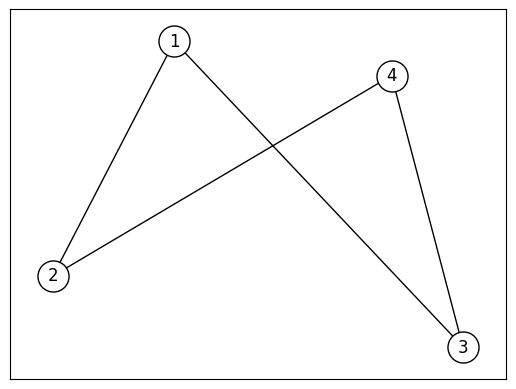

In [112]:
G_1
plot_graph(G_1)

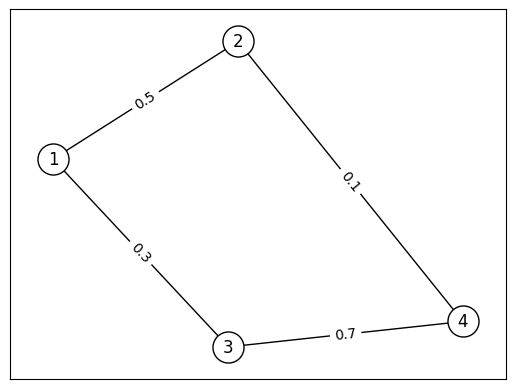

In [113]:
plot_graph(G_2)

### Направленный граф

In [ ]:
def plot_directed_graph(edges):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    plt.axis('off')
    plt.show()

edges = [
    ('A', 'C', 1),
    ('A', 'D', 5),
    ('A', 'G', 3),
    ('B', 'A', 2),
    ('B', 'E', 10),
    ('C', 'B', 1),
    ('C', 'E', 8),
    ('C', 'F', 6),
    ('C', 'G', 3),
    ('D', 'G', 4),
    ('E', 'A', 6),
    ('E', 'G', 3),
    ('F', 'E', 4),
    ('G', 'A', 2),
    ('G', 'F', 2),
]

plot_directed_graph(edges)

### Упражнение 1
Напишите функцию, вычисляющую среднюю степень соседей для каждого из узлов, у которых в принципе есть соседи.

In [114]:
def avg_neigh_degrees(G) -> dict[Any, Any]:
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = np.mean([G.degree(i) for i in G[n]])
    return data

In [115]:
G = nx.erdos_renyi_graph(n=10, p=0.2)
avg_degrees = avg_neigh_degrees(G)
print(avg_degrees)

{0: 1.0, 3: 2.0, 4: 1.5, 5: 2.0, 7: 1.5, 8: 1.0}


### Упражнение 2
Для n = 10, 20 и 30 найдите соответствующие значения p, при которых почти наверняка пройзодет невзвешенная перколяция в графе Эрдеша-Реньи G(n, p).

In [125]:
def estimate_connectivity_probability(n, p, n_trials=1000):
    count_connected = 0
    for _ in range(n_trials):
        graph = nx.erdos_renyi_graph(n, p)
        if nx.is_connected(graph):
            count_connected += 1
    return count_connected / n_trials

In [126]:
def plot_percolation_curve(n):
    p_values = np.linspace(0, 1, 20)
    connectivity_probabilities = np.zeros_like(p_values, dtype=np.float_)
    n_trials = 1000
    
    for i in range(len(p_values)):
        connectivity_probabilities[i] = estimate_connectivity_probability(n=n, p=p_values[i], n_trials=n_trials)
    
    plt.plot(p_values, connectivity_probabilities, marker='o', linestyle='-')
    plt.xlabel('Вероятность p')
    plt.ylabel('Вероятность связности')
    plt.title('Кривая перколяции для графа Эрдеша-Реньи')
    plt.grid(True)
    plt.show()

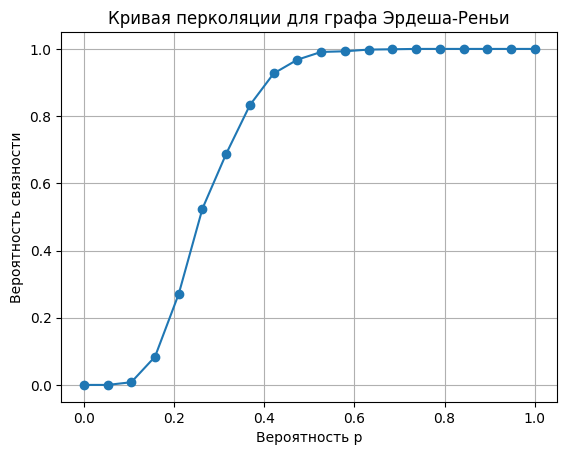

In [118]:
plot_percolation_curve(n=10)

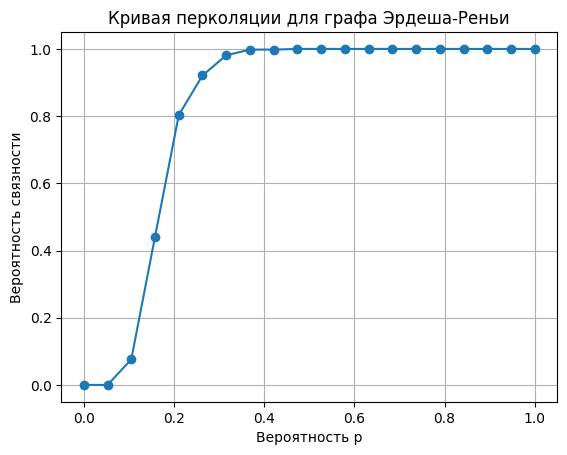

In [119]:
plot_percolation_curve(n=20)


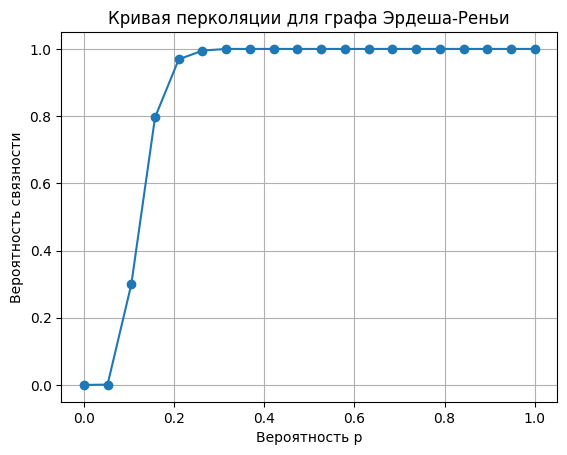

In [120]:
plot_percolation_curve(n=30)